# Correlacion

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
count = pd.read_csv('https://bit.ly/31B56KB')
count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Contaminacion_SO2  41 non-null     int64  
 1   Temperatura        41 non-null     float64
 2   Fabricas           41 non-null     int64  
 3   Habitantes         41 non-null     int64  
 4   Velocidad_viento   41 non-null     float64
 5   Lluvia             41 non-null     float64
 6   Dias_Lluvia        41 non-null     int64  
dtypes: float64(3), int64(4)
memory usage: 2.4 KB


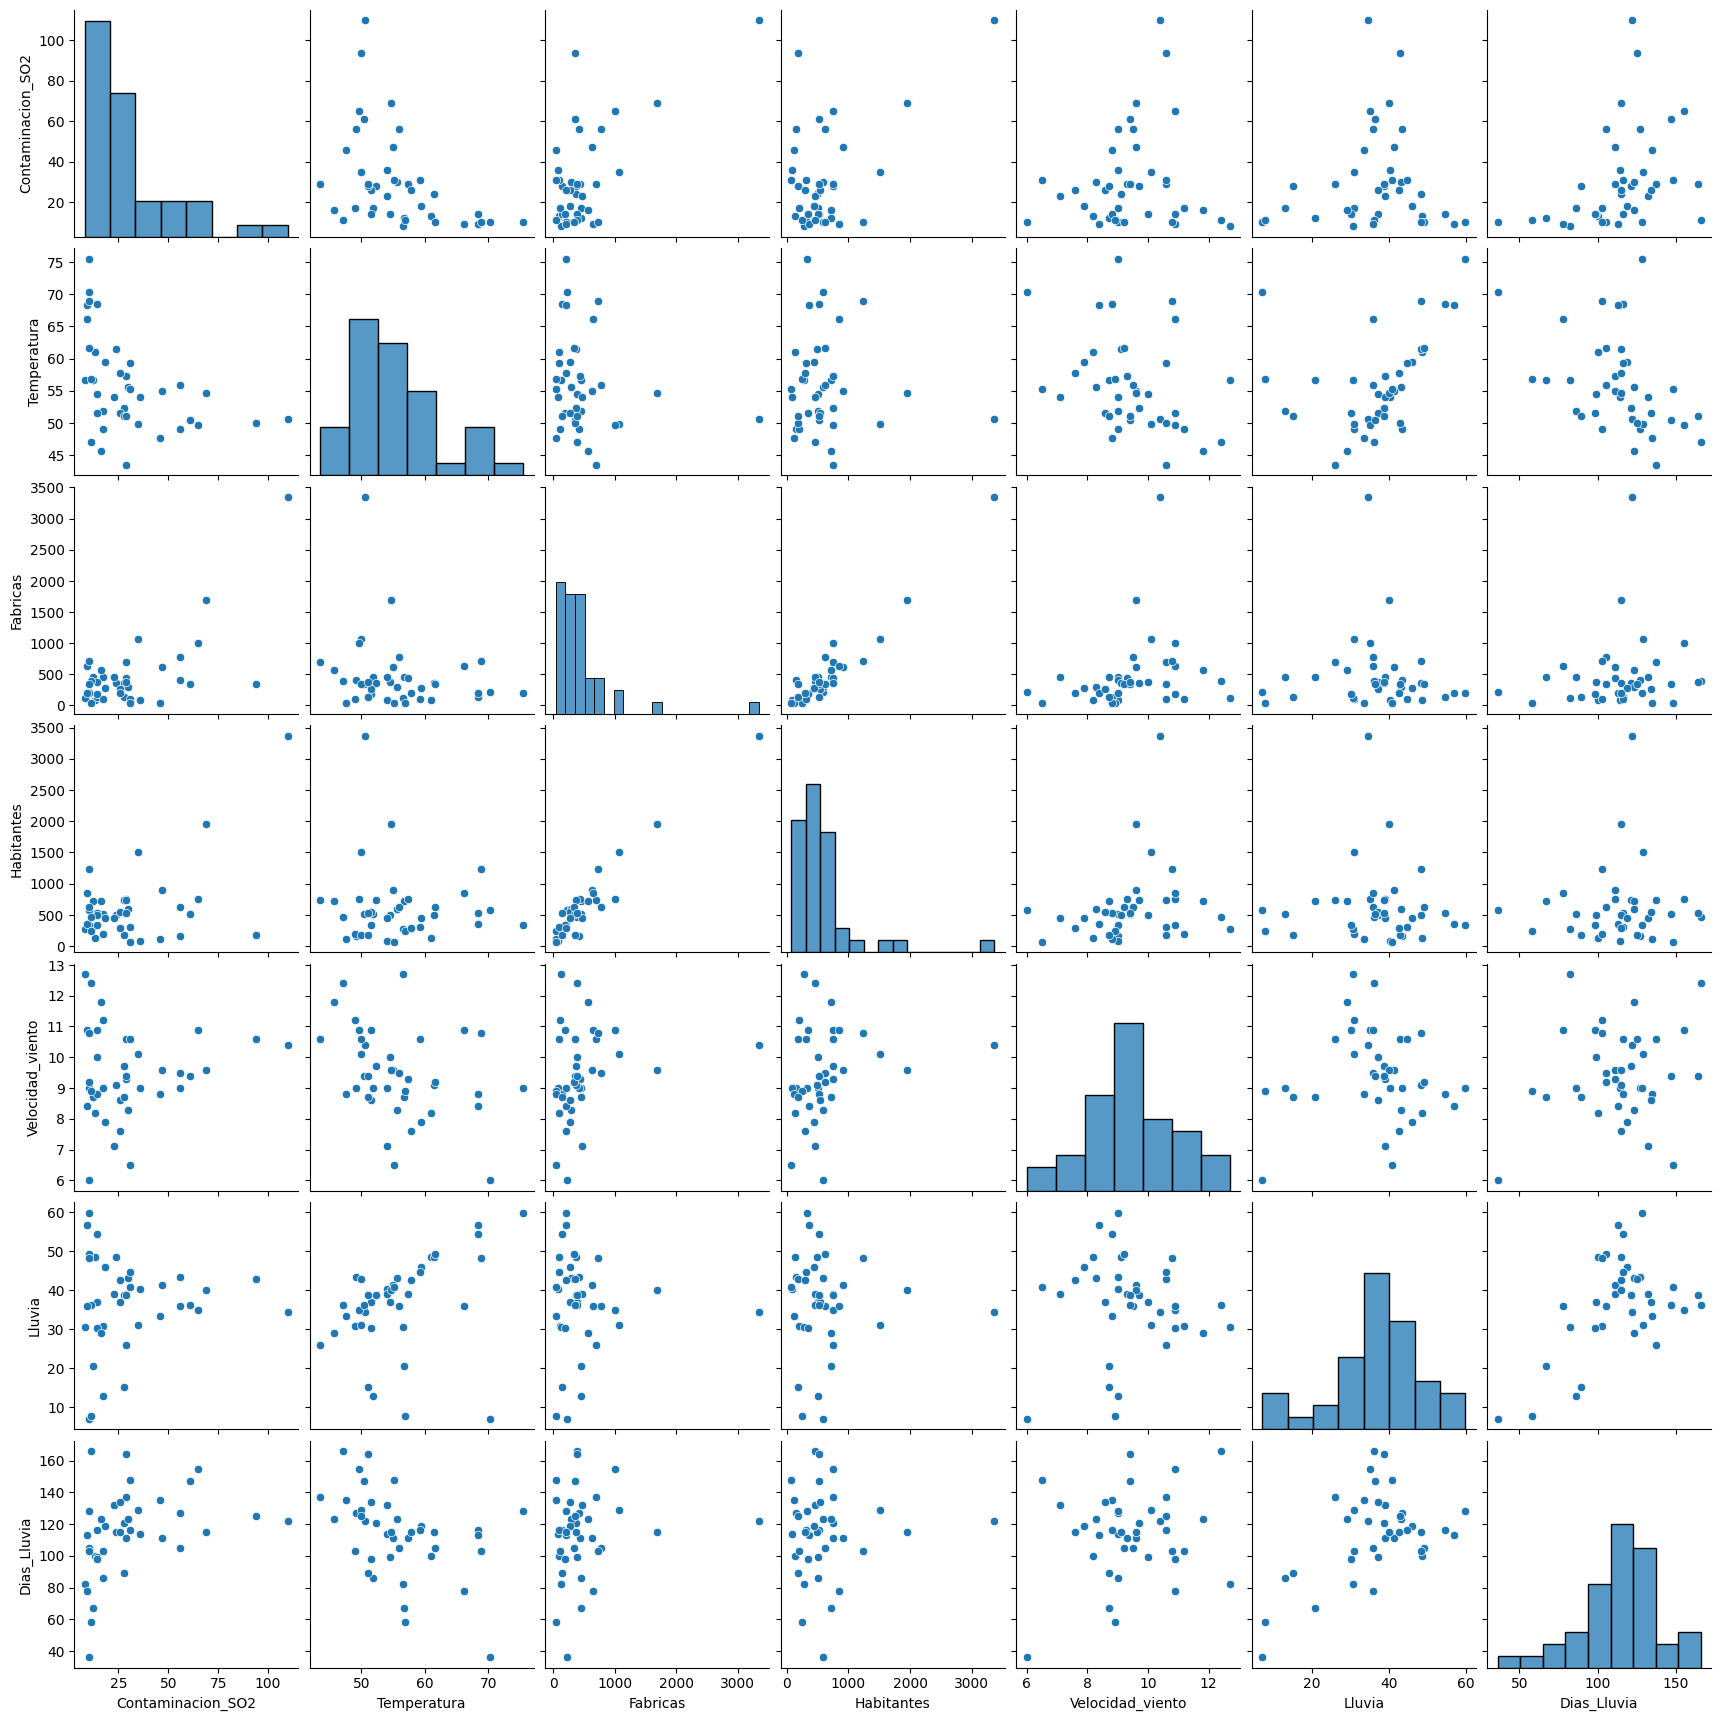

In [4]:
sns.pairplot(count)

In [5]:
count_corr = count.corr(method='spearman')
count_corr

,Contaminacion_SO2,Temperatura,Fabricas,Habitantes,Velocidad_viento,Lluvia,Dias_Lluvia
Contaminacion_SO2,1.000000,-0.538831,0.264051,0.089470,0.047309,-0.002616,0.517709
Temperatura,-0.538831,1.000000,-0.225629,0.031362,-0.398282,0.498650,-0.505730
Fabricas,0.264051,-0.225629,1.000000,0.822997,0.394193,-0.151568,0.145266
Habitantes,0.089470,0.031362,0.822997,1.000000,0.337431,-0.130314,0.010108
Velocidad_viento,0.047309,-0.398282,0.394193,0.337431,1.000000,-0.256605,0.034454
Lluvia,-0.002616,0.498650,-0.151568,-0.130314,-0.256605,1.000000,0.242342
Dias_Lluvia,0.517709,-0.505730,0.145266,0.010108,0.034454,0.242342,1.000000


<Axes: >

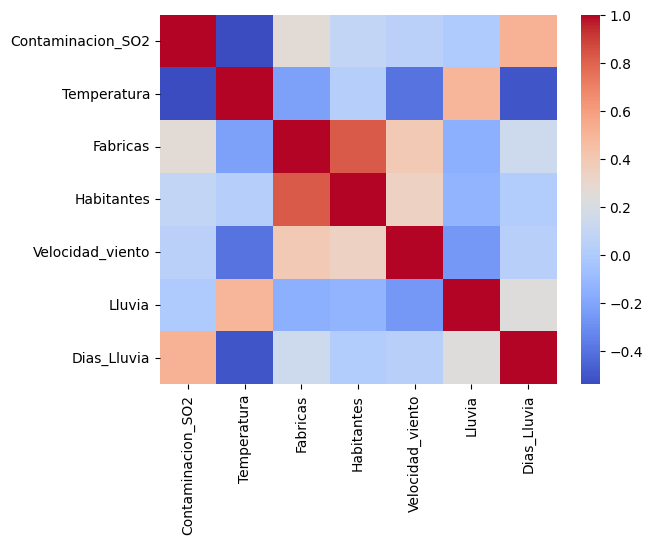

In [6]:
sns.heatmap(count_corr, cmap='coolwarm',xticklabels=count_corr.columns, yticklabels=count_corr.columns)

In [ ]:
!pip install pingouin

Revisamos la significancia 

In [10]:
import pingouin as pg 
corr = pg.pairwise_corr(count, method = 'spearman')
# Ordena los valores de acuerdo a 'p-unc'(significancia)
corr.sort_values(by=['p-unc'])[['X','Y', 'r', 'p-unc']]
# Si p-unc > 0.05 ==> posiblemnete la correlacion se debe al azar 

,X,Y,r,p-unc
11,Fabricas,Habitantes,0.822997,4.020507e-11
0,Contaminacion_SO2,Temperatura,-0.538831,2.784226e-04
5,Contaminacion_SO2,Dias_Lluvia,0.517709,5.270914e-04
10,Temperatura,Dias_Lluvia,-0.505730,7.434618e-04
9,Temperatura,Lluvia,0.498650,9.057623e-04
8,Temperatura,Velocidad_viento,-0.398282,9.906609e-03
12,Fabricas,Velocidad_viento,0.394193,1.076594e-02
15,Habitantes,Velocidad_viento,0.337431,3.096515e-02
1,Contaminacion_SO2,Fabricas,0.264051,9.527256e-02
18,Velocidad_viento,Lluvia,-0.256605,1.053381e-01


# Series de Tiempo

In [11]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [25]:
ads = pd.read_csv(r"C:\Users\ENRIQUE\Downloads\ads.csv", index_col=['Time'], parse_dates=['Time'])
cur = pd.read_csv(r"C:\Users\ENRIQUE\Downloads\currency.csv", index_col=['Time'], parse_dates=['Time'])
print(ads.head(3))
print(cur.head(3))

                       Ads
Time                      
2017-09-13 00:00:00  80115
2017-09-13 01:00:00  79885
2017-09-13 02:00:00  89325
            GEMS_GEMS_SPENT
Time                       
2017-05-01          1199436
2017-05-02          1045515
2017-05-03           586111


C:\Users\ENRIQUE\AppData\Local\Temp\ipykernel_8652\2390693437.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cur = pd.read_csv(r"C:\Users\ENRIQUE\Downloads\currency.csv", index_col=['Time'], parse_dates=['Time'])


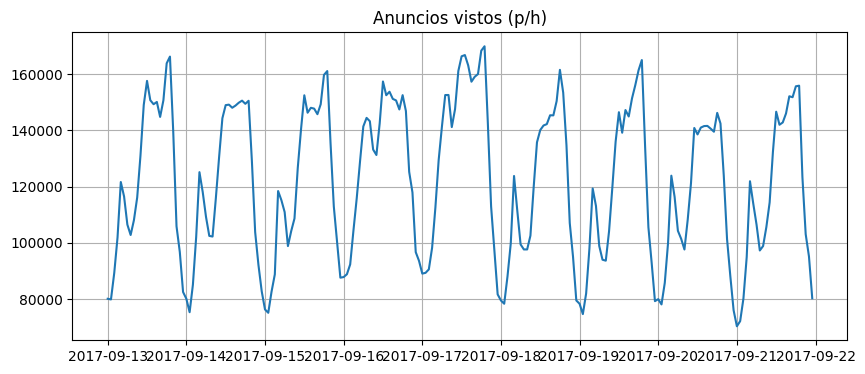

In [26]:
plt.figure(figsize=(10,4))
plt.plot(ads.Ads)
plt.title('Anuncios vistos (p/h)')
plt.grid(True)
plt.show()

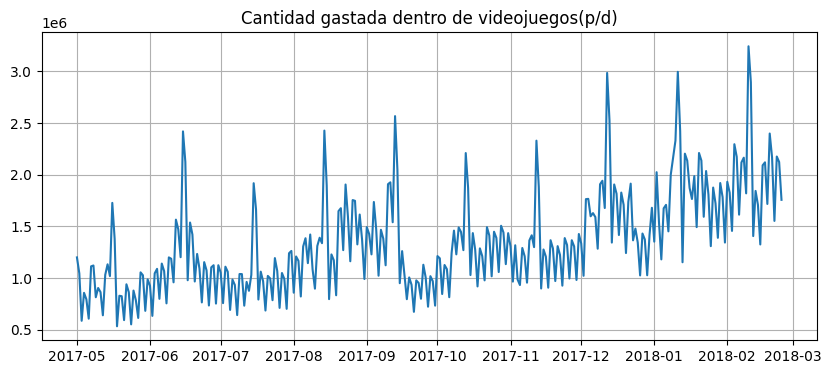

In [20]:
plt.figure(figsize=(10,4))
plt.plot(ads.GEMS_GEMS_SPENT)
plt.title('Cantidad gastada dentro de videojuegos(p/d)')
plt.grid(True)
plt.show()